## Import Modual

In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

my_year_month_fmt = mdates.DateFormatter('%m/%y')

## Import Data

In [2]:
SP = pdr.get_data_yahoo('^GSPC',start = '2008-01-01', end = '2018-01-01')['Adj Close']

[*********************100%***********************]  1 of 1 completed


## Plot Data

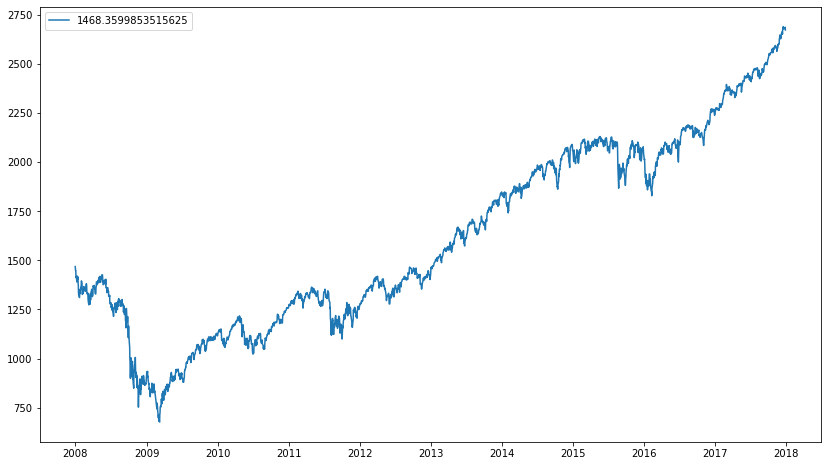

In [3]:
plt.figure(figsize=(14,8))
plt.plot(SP)
plt.legend(SP)
plt.show()

## Daily Returns 

In [4]:
DR = SP.pct_change()*100

In [5]:
print(DR.head())

Date
2007-12-31         NaN
2008-01-02   -1.443784
2008-01-03    0.000000
2008-01-04   -2.455156
2008-01-07    0.322326
Name: Adj Close, dtype: float64


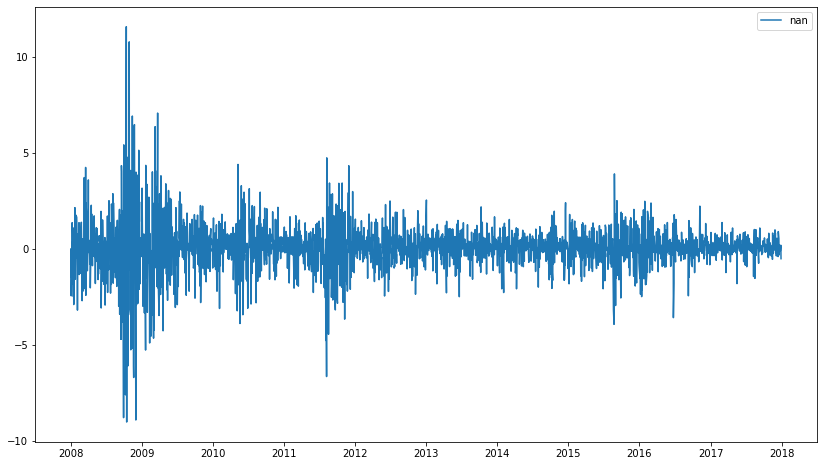

In [6]:
plt.figure(figsize=(14,8))
plt.plot(DR)
plt.legend(DR)
plt.show()

## 5 Worst Daily Drawdowns 

In [7]:
SP['running_min'] = DR.expanding().min()

Date
2007-12-31         NaN
2008-01-02   -1.443784
2008-01-03   -1.443784
2008-01-04   -2.455156
2008-01-07   -2.455156
Name: Adj Close, dtype: float64


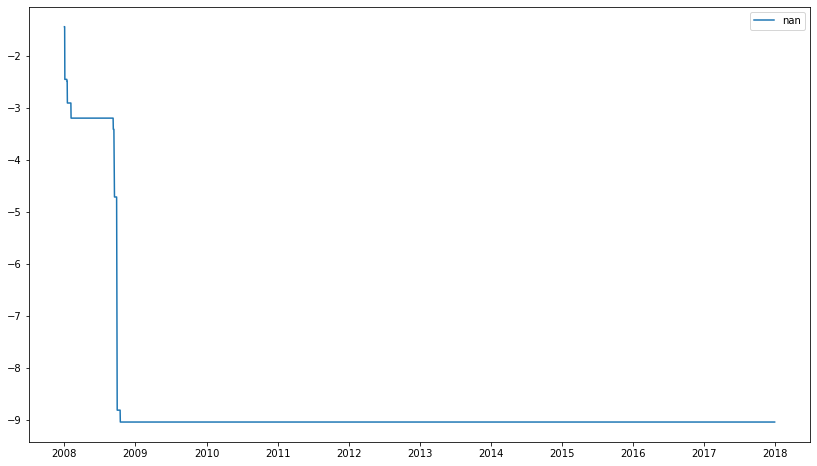

In [8]:
print (SP['running_min'].head())
plt.figure(figsize=(14,8))
plt.plot(SP['running_min'])
plt.legend(SP['running_min'])
plt.show() 

## Moving Average Stratgey

In [9]:
import seaborn as sns
SP1 = pdr.get_data_yahoo('^GSPC',start = '2008-01-01', end = '2018-01-01')['Adj Close']
SP2 = pdr.get_data_yahoo('^GSPC',start = '2008-01-01', end = '2018-01-01')['Adj Close']
sns.set(style='darkgrid', context='talk', palette='Dark2')

SP1 = pd.DataFrame(SP1)
SP2 = pd.DataFrame(SP2)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
# claculating the short_window simple moving average
short_rolling = SP1.rolling(window =30).mean()
SP1['MA 30'] = short_rolling 

In [11]:
print(SP1)

              Adj Close        MA 30
Date                                
2007-12-31  1468.359985          NaN
2008-01-02  1447.160034          NaN
2008-01-03  1447.160034          NaN
2008-01-04  1411.630005          NaN
2008-01-07  1416.180054          NaN
...                 ...          ...
2017-12-22  2683.340088  2630.681356
2017-12-26  2680.500000  2633.954688
2017-12-27  2682.620117  2637.214022
2017-12-28  2687.540039  2640.836353
2017-12-29  2673.610107  2644.469352

[2519 rows x 2 columns]


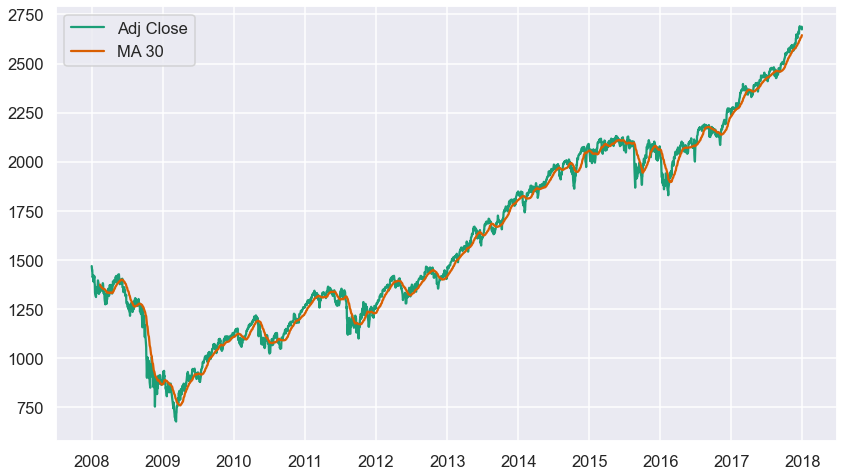

In [12]:
plt.figure(figsize=(14,8))
plt.plot(SP1)
plt.legend(SP1)
plt.show()

## Positions

In [13]:
# Taking the difference between the prices and the MA timeseries 
trading_positions_raw = SP2 - short_rolling 
trading_positions_raw.tail()

,Adj Close
Date,
2017-12-22,52.658732
2017-12-26,46.545312
2017-12-27,45.406095
2017-12-28,46.703687
2017-12-29,29.140755


In [14]:
# Taking the sign of the difference to determine whether the price or the EMA is greater and then multiplying by 1/3 
trading_positions = trading_positions_raw.apply(np.sign)
trading_positions.tail()

,Adj Close
Date,
2017-12-22,1.0
2017-12-26,1.0
2017-12-27,1.0
2017-12-28,1.0
2017-12-29,1.0


In [15]:
# Lagging our trading signals by one day.
trading_positions_final = trading_positions.shift(1)

In [16]:
# Log returns - First the logarithm of the prices is taken and the difference of consecutive (log) observations
asset_log_returns = np.log(SP2).diff()
asset_log_returns.head()

,Adj Close
Date,
2007-12-31,NaN
2008-01-02,-0.014543
2008-01-03,0.000000
2008-01-04,-0.024858
2008-01-07,0.003218


In [17]:
strategy_asset_log_returns = trading_positions_final * asset_log_returns
strategy_asset_log_returns.tail()

,Adj Close
Date,
2017-12-22,-0.000458
2017-12-26,-0.001059
2017-12-27,0.000791
2017-12-28,0.001832
2017-12-29,-0.005197


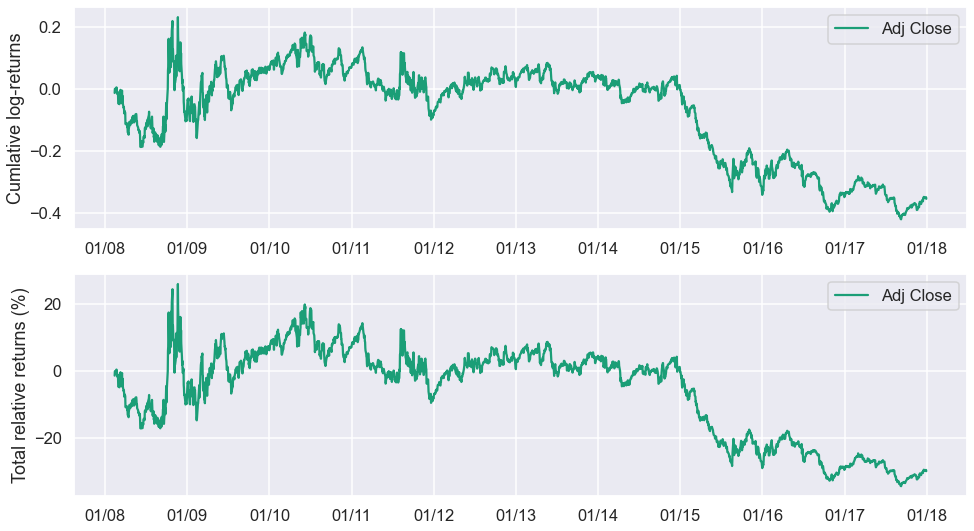

In [20]:
# Get the cumulative log-returns per asset 
cum_strategy_asset_log_returns = strategy_asset_log_returns.cumsum()

# Transform the cumulative log returns to relative returns
cum_strategy_asset_relative_returns = np.exp(cum_strategy_asset_log_returns) - 1 

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(16,9))

for c in asset_log_returns:
    ax1.plot(cum_strategy_asset_log_returns.index, cum_strategy_asset_log_returns[c], label = str(c))
    
ax1.set_ylabel('Cumlative log-returns')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)


for c in asset_log_returns:
    ax2.plot(cum_strategy_asset_relative_returns.index, 100*cum_strategy_asset_relative_returns[c],label=str(c))

ax2.set_ylabel('Total relative returns (%)')
ax2.legend(loc='best')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

plt.show()

